# Telecom Churn Prediction - SMOTE



## Imbalanced datasets

Imbalanced datasets pose a common challenge for machine learning practitioners in binary classification problems. This scenario frequently arises in practical business applications like fraud detection, spam filtering, rare disease discovery, and hardware fault detection. To address this issue, one popular technique is Synthetic Minority Oversampling Technique (SMOTE). SMOTE is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.

## SMOTE

it is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
__author__ = "Bing Huang"
__email__ = "Binghuang1990@gmail.com"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_raw = pd.read_csv("telecom_cleaned.csv", index_col = 0)
df_raw.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [6]:
df_raw['SeniorCitizen'] = df_raw['SeniorCitizen'].astype(str)

In [7]:
df = df_raw.copy()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 1869 to 860
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   object 
 1   SeniorCitizen     5976 non-null   object 
 2   Partner           5976 non-null   object 
 3   Dependents        5976 non-null   object 
 4   tenure            5976 non-null   int64  
 5   PhoneService      5976 non-null   object 
 6   MultipleLines     5976 non-null   object 
 7   InternetService   5976 non-null   object 
 8   OnlineSecurity    5976 non-null   object 
 9   OnlineBackup      5976 non-null   object 
 10  DeviceProtection  5976 non-null   object 
 11  TechSupport       5976 non-null   object 
 12  StreamingTV       5976 non-null   object 
 13  StreamingMovies   5976 non-null   object 
 14  Contract          5976 non-null   object 
 15  PaperlessBilling  5976 non-null   object 
 16  PaymentMethod     5976 non-null   object 
 17

In [9]:
# check churn probability

df.Churn.value_counts(normalize = True)

,proportion
Churn,
No,0.734438
Yes,0.265562


# SMOTE

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [11]:
X = df.drop('Churn', axis =1)
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4482, 19), (1494, 19), (4482,), (1494,))

In [12]:
y_train.value_counts(normalize = True)

,proportion
Churn,
No,0.734494
Yes,0.265506


In [13]:


from imblearn.combine import SMOTETomek
from collections import Counter

# Counting the number of instances in each class before oversampling
counter = Counter(y_train)
print('Before', counter)

# Oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded  = pd.get_dummies(X_test, columns=categorical_cols)

X_train_sm, y_train_sm = smtom.fit_resample(X_train_encoded, y_train)

# Counting the number of instances in each class after oversampling
counter = Counter(y_train_sm)
print('After', counter)

Before Counter({'No': 3292, 'Yes': 1190})
After Counter({'No': 3012, 'Yes': 3012})


In [14]:
y_train_sm.value_counts(normalize = True)

,proportion
Churn,
No,0.5
Yes,0.5


now i have X_train_sm and y_train_sm

In [15]:
X_train_sm

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,65,100.150000,6643.500000,True,False,True,False,False,True,True,...,False,False,True,False,False,True,True,False,False,False
1,12,19.300000,228.750000,True,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,64,68.300000,4378.800000,True,False,True,False,False,True,True,...,True,False,False,True,False,True,False,False,False,True
3,2,54.450000,87.300000,False,True,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
4,41,20.650000,875.550000,True,False,True,False,False,True,True,...,False,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,1,70.718463,70.718463,True,False,True,True,True,False,True,...,False,True,False,False,False,True,False,False,True,False
6020,49,103.700000,5054.713374,False,True,True,False,True,True,True,...,True,True,False,False,True,True,True,False,True,False
6021,30,91.258017,2995.577857,True,True,True,True,False,True,True,...,True,True,False,False,False,True,False,False,True,False
6022,5,89.265248,454.340925,True,False,True,False,True,True,True,...,True,True,False,False,False,True,False,False,True,True


In [16]:
X_test_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3898,48,25.05,1171.50,True,False,True,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False
142,61,101.05,5971.25,True,False,True,False,False,True,True,...,True,False,False,True,False,True,True,False,False,False
1594,62,26.00,1638.70,True,False,True,False,True,False,False,...,False,False,False,True,True,False,True,False,False,False
2848,24,56.25,1454.25,False,True,True,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2010,5,75.90,357.75,False,True,True,False,True,False,True,...,False,True,False,False,False,True,True,False,False,False


# ML Modelling

# Logistic Regression

In [17]:

# Define the numeric features
features_num = ['tenure', 'MonthlyCharges', 'TotalCharges']

num_transformer = Pipeline(steps=[
                                  ("scaler", StandardScaler().set_output(transform="pandas"))
                                  ])

preprocessor = ColumnTransformer(transformers=[
                                  ("num", num_transformer, features_num)
                                  ], remainder='passthrough')  # 'passthrough' keeps the boolean columns as is

lr_model = LogisticRegression(random_state=42, solver='liblinear')

pipeline_lr = Pipeline(steps=[
                              ("preprocess", preprocessor),
                              ("model", lr_model)
                              ])

In [18]:
pipeline_lr.fit(X_train_sm, y_train_sm)

y_pred_lr = pipeline_lr.predict(X_test_encoded)

# 1. check confusion matrix
class_labels = pipeline_lr.named_steps['model'].classes_

pd.DataFrame(confusion_matrix(y_true = y_test, y_pred=y_pred_lr),
             columns = class_labels,
             index = class_labels)

,No,Yes
No,951,146
Yes,162,235


In [19]:
# 2. check classification_report
cr_lr = classification_report(y_test, y_pred_lr)
print(cr_lr)

              precision    recall  f1-score   support

          No       0.85      0.87      0.86      1097
         Yes       0.62      0.59      0.60       397

    accuracy                           0.79      1494
   macro avg       0.74      0.73      0.73      1494
weighted avg       0.79      0.79      0.79      1494



### Tuning the model

In [20]:
# based on recall_weighted

param_grid = {
    'model__C': [0.01, 0.1, 1.0, 10.0],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga'],
    'model__max_iter': [100, 200, 500],
}


grid_search = GridSearchCV(estimator=pipeline_lr,
                           param_grid=param_grid,
                           scoring='recall_weighted',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)


grid_search.fit(X_train_sm, y_train_sm)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

y_pred_lr_tuned = best_model.predict(X_test_encoded)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr_tuned))

confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred_lr_tuned),
                            columns=best_model.named_steps['model'].classes_,
                            index=best_model.named_steps['model'].classes_)
print(confusion_df)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'model__C': 1.0, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
              precision    recall  f1-score   support

          No       0.85      0.88      0.86      1097
         Yes       0.63      0.57      0.60       397

    accuracy                           0.80      1494
   macro avg       0.74      0.73      0.73      1494
weighted avg       0.79      0.80      0.79      1494

      No  Yes
No   963  134
Yes  169  228


In [21]:
from sklearn.metrics import recall_score, f1_score, accuracy_score

# Calculate recall, accuracy, and F1 score for multi-class classification
recall_lr = recall_score(y_test, y_pred_lr_tuned, average='weighted')
accuracy_lr = accuracy_score(y_test, y_pred_lr_tuned)
f1_lr = f1_score(y_test, y_pred_lr_tuned, average='weighted')

# Print the results
print(f"Recall (Weighted): {recall_lr}")
print(f"Accuracy: {accuracy_lr}")
print(f"F1 Score (Weighted): {f1_lr}")



Recall (Weighted): 0.7971887550200804
Accuracy: 0.7971887550200804
F1 Score (Weighted): 0.7941048885142423


# Random Forest

In [22]:
rf_model = RandomForestClassifier(random_state = 42)

pipeline_rf = Pipeline(steps=[
                              ("preprocess", preprocessor),
                              ("model", rf_model)
                              ])

pipeline_rf.fit(X_train_sm, y_train_sm)

y_pred_rf = pipeline_rf.predict(X_test_encoded)

In [23]:
pd.DataFrame(confusion_matrix(y_true = y_test, y_pred=y_pred_rf),
             columns = ["predicted No", "predicted Yes"],
             index = ["Actual No", "Actual Yes"])

,predicted No,predicted Yes
Actual No,974,123
Actual Yes,182,215


In [24]:
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1097
         Yes       0.64      0.54      0.59       397

    accuracy                           0.80      1494
   macro avg       0.74      0.71      0.72      1494
weighted avg       0.79      0.80      0.79      1494



In [25]:
# 2. check classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1097
         Yes       0.64      0.54      0.59       397

    accuracy                           0.80      1494
   macro avg       0.74      0.71      0.72      1494
weighted avg       0.79      0.80      0.79      1494



### Tuning the model

In [26]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 10],
    'model__min_samples_leaf': [1, 4],
    'model__max_features': ['sqrt', 'log2', None]
}

pipeline_rf = Pipeline(steps=[
                              ("preprocess", preprocessor),
                              ("model", rf_model)
                              ])

grid_search = GridSearchCV(estimator=pipeline_rf,
                           param_grid=param_grid,
                           scoring='recall_weighted',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_sm, y_train_sm)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

y_pred_rf_tuned = best_model.predict(X_test_encoded)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_tuned))

confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred_rf_tuned),
                            columns=best_model.named_steps['model'].classes_,
                            index=best_model.named_steps['model'].classes_)
print(confusion_df)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
              precision    recall  f1-score   support

          No       0.88      0.85      0.86      1097
         Yes       0.61      0.67      0.64       397

    accuracy                           0.80      1494
   macro avg       0.75      0.76      0.75      1494
weighted avg       0.81      0.80      0.80      1494

      No  Yes
No   930  167
Yes  131  266


In [51]:
recall_rf = recall_score(y_test, y_pred_rf_tuned, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_rf_tuned)
f1_rf = f1_score(y_test, y_pred_rf_tuned, average='weighted')

# Print the results
print(f"Recall (Weighted): {recall_rf}")
print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score (Weighted): {f1_rf}")


Recall (Weighted): 0.8005354752342704
Accuracy: 0.8005354752342704
F1 Score (Weighted): 0.8031974670383728


#### Feature Importance

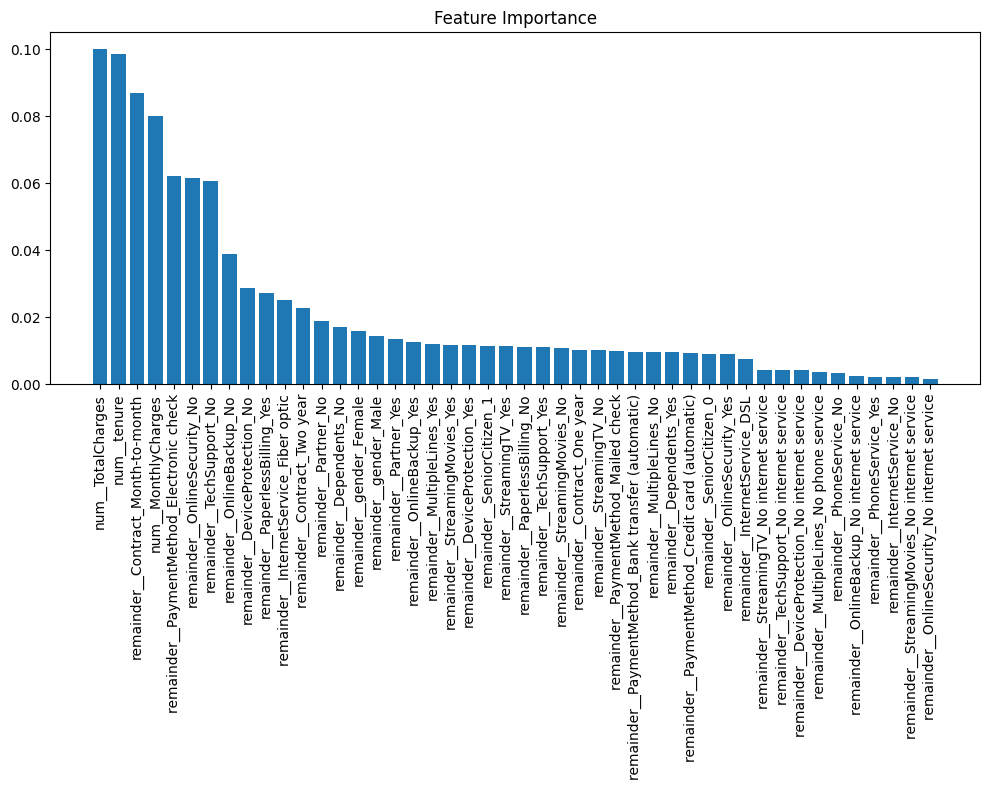

In [27]:

# After fitting the pipeline
pipeline_rf.fit(X_train_sm, y_train_sm)

# Access the trained RandomForestClassifier from the pipeline
rf_model_trained = pipeline_rf.named_steps['model']

# Get feature importances
importances = rf_model_trained.feature_importances_

# Access the feature names from the preprocessor
feature_names = pipeline_rf.named_steps['preprocess'].get_feature_names_out()

# Sort feature importances in descending order and get sorted indices
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [28]:
sorted_indices

# print the important features
X_train_sm.columns[sorted_indices]

Index(['TotalCharges', 'tenure', 'Contract_Month-to-month', 'MonthlyCharges',
       'PaymentMethod_Electronic check', 'OnlineSecurity_No', 'TechSupport_No',
       'OnlineBackup_No', 'DeviceProtection_No', 'PaperlessBilling_Yes',
       'InternetService_Fiber optic', 'Contract_Two year', 'Partner_No',
       'Dependents_No', 'gender_Female', 'gender_Male', 'Partner_Yes',
       'OnlineBackup_Yes', 'MultipleLines_Yes', 'StreamingMovies_Yes',
       'DeviceProtection_Yes', 'SeniorCitizen_1', 'StreamingTV_Yes',
       'PaperlessBilling_No', 'TechSupport_Yes', 'StreamingMovies_No',
       'Contract_One year', 'StreamingTV_No', 'PaymentMethod_Mailed check',
       'PaymentMethod_Bank transfer (automatic)', 'MultipleLines_No',
       'Dependents_Yes', 'PaymentMethod_Credit card (automatic)',
       'SeniorCitizen_0', 'OnlineSecurity_Yes', 'InternetService_DSL',
       'StreamingTV_No internet service', 'TechSupport_No internet service',
       'DeviceProtection_No internet service',
       

In [29]:
len(sorted_indices)

46

In [30]:
len(sorted_indices[:-10])

36

#### Only consider the first 36 features

In [31]:
new_features = X_train_sm.columns[sorted_indices[:-10]]

In [32]:
X_train_new = X_train_sm[new_features]
X_test_new = X_test_encoded[new_features]

In [33]:
rf_model = RandomForestClassifier(random_state = 42)

pipeline_rf = Pipeline(steps=[
                              ("preprocess", preprocessor),
                              ("model", rf_model)
                              ])

pipeline_rf.fit(X_train_new, y_train_sm)

y_pred_rf = pipeline_rf.predict(X_test_new)

pd.DataFrame(confusion_matrix(y_true = y_test, y_pred=y_pred_rf),
             columns = ["predicted No", "predicted Yes"],
             index = ["Actual No", "Actual Yes"])

,predicted No,predicted Yes
Actual No,967,130
Actual Yes,178,219


In [34]:
cr_rf_new = classification_report(y_test, y_pred_rf)
print(cr_rf_new)

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1097
         Yes       0.63      0.55      0.59       397

    accuracy                           0.79      1494
   macro avg       0.74      0.72      0.72      1494
weighted avg       0.79      0.79      0.79      1494



In [35]:
# 2. check classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1097
         Yes       0.63      0.55      0.59       397

    accuracy                           0.79      1494
   macro avg       0.74      0.72      0.72      1494
weighted avg       0.79      0.79      0.79      1494



# Ada Boost model

In [36]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=42)
pipeline_ada_boost = Pipeline([("pre_process", preprocessor),
                               ("model", ada_boost)])

In [37]:
pipeline_ada_boost.fit(X_train_sm, y_train_sm)

y_pred_ad = pipeline_ada_boost.predict(X_test_encoded)

class_labels = pipeline_ada_boost.named_steps['model'].classes_

print(classification_report(y_test, y_pred_ad))

pd.DataFrame(confusion_matrix(y_test, y_pred_ad),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

          No       0.87      0.84      0.85      1097
         Yes       0.59      0.65      0.62       397

    accuracy                           0.79      1494
   macro avg       0.73      0.75      0.74      1494
weighted avg       0.80      0.79      0.79      1494



,No,Yes
No,919,178
Yes,138,259


In [38]:
cr_ad = classification_report(y_test, y_pred_ad)
print(cr_ad)

              precision    recall  f1-score   support

          No       0.87      0.84      0.85      1097
         Yes       0.59      0.65      0.62       397

    accuracy                           0.79      1494
   macro avg       0.73      0.75      0.74      1494
weighted avg       0.80      0.79      0.79      1494



### Tuning the model

In [39]:
ada_boost.get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [40]:
# score: accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

base_estimator = DecisionTreeClassifier()

ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3],
}


grid_search = GridSearchCV(estimator=ada,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_sm, y_train_sm)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

y_pred_ad = best_estimator.predict(X_test_encoded)

print(classification_report(y_test, y_pred_ad))

confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred_ad),
                            index=best_estimator.classes_,
                            columns=best_estimator.classes_)
confusion_df

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 50}
              precision    recall  f1-score   support

          No       0.91      0.68      0.78      1097
         Yes       0.48      0.80      0.60       397

    accuracy                           0.71      1494
   macro avg       0.69      0.74      0.69      1494
weighted avg       0.79      0.71      0.73      1494



,No,Yes
No,747,350
Yes,78,319


In [41]:
# scoring : f1_weigted

base_estimator = DecisionTreeClassifier()

ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3],
}


grid_search = GridSearchCV(estimator=ada,
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_sm, y_train_sm)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

y_pred_ad = best_estimator.predict(X_test_encoded)

print(classification_report(y_test, y_pred_ad))

confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred_ad),
                            index=best_estimator.classes_,
                            columns=best_estimator.classes_)
confusion_df

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 50}
              precision    recall  f1-score   support

          No       0.87      0.84      0.85      1097
         Yes       0.59      0.65      0.62       397

    accuracy                           0.79      1494
   macro avg       0.73      0.75      0.74      1494
weighted avg       0.80      0.79      0.79      1494



,No,Yes
No,919,178
Yes,138,259


# Gradient Boost

In [42]:
gbm = GradientBoostingClassifier(random_state=42)

pipeline_gbm = Pipeline([("pre_process", preprocessor),
                         ("model", gbm)])

pipeline_gbm.fit(X_train_sm, y_train_sm)
y_pred_gbm = pipeline_gbm.predict(X_test_encoded)

class_labels = pipeline_gbm.named_steps['model'].classes_

print(classification_report(y_test, y_pred_gbm))

pd.DataFrame(confusion_matrix(y_test, y_pred_gbm),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

          No       0.86      0.87      0.86      1097
         Yes       0.62      0.60      0.61       397

    accuracy                           0.80      1494
   macro avg       0.74      0.73      0.73      1494
weighted avg       0.79      0.80      0.79      1494



,No,Yes
No,951,146
Yes,160,237


In [43]:
cr_gbm = classification_report(y_test, y_pred_gbm)
print(cr_gbm)

              precision    recall  f1-score   support

          No       0.86      0.87      0.86      1097
         Yes       0.62      0.60      0.61       397

    accuracy                           0.80      1494
   macro avg       0.74      0.73      0.73      1494
weighted avg       0.79      0.80      0.79      1494



# XG Boost

In [44]:
xgb = XGBClassifier(random_state=42)

pipeline_xgb = Pipeline([("pre_process", preprocessor),
                         ("model", xgb)])
pipeline_xgb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_ro...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# transform y labels into 0 and 1 as latest xgboost version doesn't support string labels
y_train_le = le.fit_transform(y_train_sm)
y_test_le = le.transform(y_test)

pipeline_xgb.fit(X_train_sm, y_train_le)
y_pred_le = pipeline_xgb.predict(X_test_encoded)

In [46]:
y_pred = le.inverse_transform(y_pred_le)

In [47]:
class_labels = le.classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1097
         Yes       0.62      0.54      0.58       397

    accuracy                           0.79      1494
   macro avg       0.73      0.71      0.72      1494
weighted avg       0.78      0.79      0.78      1494



,No,Yes
No,964,133
Yes,182,215


In [48]:
cr_xgb = classification_report(y_test, y_pred)
print(cr_xgb)

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1097
         Yes       0.62      0.54      0.58       397

    accuracy                           0.79      1494
   macro avg       0.73      0.71      0.72      1494
weighted avg       0.78      0.79      0.78      1494



In [49]:
# import pandas as pd
# from sklearn.metrics import classification_report

# # Assuming y_test, y_pred_lr, y_pred_rf, y_pred_ad, y_pred_gbm, and y_pred are already defined

# # Create DataFrames for each classification report
# df_cr_lr = pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).transpose()
# df_cr_rf = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
# df_cr_ad = pd.DataFrame(classification_report(y_test, y_pred_ad, output_dict=True)).transpose()
# df_cr_gbm = pd.DataFrame(classification_report(y_test, y_pred_gbm, output_dict=True)).transpose()  # Corrected 'gdm' to 'gbm'
# df_cr_xgb = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# # Add a column to indicate the source of each report
# df_cr_lr['Model'] = 'Logistic Regression'
# df_cr_rf['Model'] = 'Random Forest'
# df_cr_ad['Model'] = 'Ada Boost'
# df_cr_gbm['Model'] = 'Gradient Boost'
# df_cr_xgb['Model'] = 'XGBoost'

# # Concatenate all reports into a single DataFrame
# df_all_reports = pd.concat([df_cr_lr, df_cr_rf, df_cr_ad, df_cr_gbm, df_cr_xgb])

# # Reset index (optional)
# df_all_reports.reset_index(inplace=True)

# df_all_reports

In [50]:
# # Assuming y_test, y_pred_lr, y_pred_rf, y_pred_ad, y_pred_gbm, and y_pred are already defined

# # Create DataFrames for each classification report
# df_cr_lr = pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).transpose()
# df_cr_rf = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
# df_cr_ad = pd.DataFrame(classification_report(y_test, y_pred_ad, output_dict=True)).transpose()
# df_cr_gbm = pd.DataFrame(classification_report(y_test, y_pred_gbm, output_dict=True)).transpose()
# df_cr_xgb = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# # Rename columns to distinguish models in the final report
# df_cr_lr.columns = [f'LR_{col}' for col in df_cr_lr.columns]
# df_cr_rf.columns = [f'RF_{col}' for col in df_cr_rf.columns]
# df_cr_ad.columns = [f'AD_{col}' for col in df_cr_ad.columns]
# df_cr_gbm.columns = [f'GBM_{col}' for col in df_cr_gbm.columns]
# df_cr_xgb.columns = [f'XGB_{col}' for col in df_cr_xgb.columns]

# # Merge DataFrames on their index (which should be 'precision', 'recall', etc.)
# df_all_reports = df_cr_lr.join([df_cr_rf, df_cr_ad, df_cr_gbm, df_cr_xgb], how='outer')

# # Reset index if needed (optional)
# df_all_reports.reset_index(inplace=True)

# # Round floating-point numbers to two decimal places
# df_all_reports = df_all_reports.round(2)

# df_all_reports